<a href="https://colab.research.google.com/github/Hataeju/Practice/blob/main/part3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. 데이터 준비

### 기본 라이브러리 Import

In [ ]:
# 기본라이브러리 import
from google.colab import drive
import os, json, pickle
import subprocess
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### 라이브러리 추가 설치 및 Import

In [ ]:
!pip install pefile

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 2.2 MB/s eta 0:00:00


In [ ]:
!pip install yara-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 13.2 MB/s eta 0:00:00


In [ ]:
!pip install peid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 554.9/554.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 10.9 MB/s eta 0:00:00


In [ ]:
# 추가 라이브러리 import
import pefile
import yara

### 데이터 로드

In [ ]:
# 구글 드라이브 mount
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# 데이터 파일 위치
colab_path = "gdrive/My Drive/AI보안교육/part3/"


In [ ]:
# ! 주석을 해제하여 한번만 실행하세요!
# ! 파일 취급에 주의해주세요!
# ! 명령 실행 후 바로 다시 주석처리 해주세요 !
#!unzip -P 'infected' -qq '/content/gdrive/My Drive/AI보안교육/part3/data_orig/train.zip' -d '/content/gdrive/My Drive/AI보안교육/part3/data_train'
#!unzip -P 'infected' -qq '/content/gdrive/My Drive/AI보안교육/part3/data_orig/test.zip' -d '/content/gdrive/My Drive/AI보안교육/part3/data_test'

In [ ]:
# data_train, data_test에 파일이 압축해제 되어 있는지 확인해 주세요.
# local PC로 다운받지 마세요.
# virus total등 외부 분석 서비스에 업로드 하시면 안됩니다.
# 해당 실습을 위해서만 활용가능합니다. 다른 곳에 공유/사용되면 안됩니다.

In [ ]:
# 레이블 파일 로드 => 학습데이터의 초기 Dataframe으로 사용한다.
df_train = pd.read_csv(colab_path + "data_orig/trainSet_label_1000.csv",index_col='hash')
#df_train = df_train[:20] # 처음에는 20개정도의 파일로 Feature Engineering이 잘 되는지 검증 후, 주석 처리하여 전체 파일로 확대한다.

In [ ]:
df_train

,index_orig,target
hash,,
ac282b5c526acab44530c0a995d4e23a.vir,6710,1
7a44a4bf7c9a7f332901e6a792e9c8b5.vir,4725,0
1581f524dec2cc3ba8bef37f3ab3d1fd.vir,872,0
15166c91b32b49734932ccae17426f16.vir,862,1
cba8e5374081db7da8d45fa98359d87f.vir,7976,1
...,...,...
e638f5c2fc248ef94a75bbca6923cb57.vir,9004,0
0a9dea1605ae2f00f5e3ab2b41b4548d.vir,419,1
f3bf38b27d8a472be11cb2967fcea3ff.vir,9527,0


In [ ]:
# prompt: df_train에 있는 파일명(hash 컬럼)을 가져와서 colab_path 뒤에 data_train 폴더에서 해당 파일을 찾아서 실제로 md5를 구한 다음, 파일명에 있는 md5와 일치하는지 검증하고, 일치하지 않는 것은 출력, 그 후 요약해줘. 비교할때는 파일명에서 앞에 32자만 가지고 비교해

import hashlib

mismatched_files = []
for index, row in df_train.iterrows():
  filename = index
  filepath = os.path.join(colab_path, "data_train", filename)
  try:
    with open(filepath, "rb") as f:
      file_hash = hashlib.md5(f.read()).hexdigest()
    if file_hash[:32] != filename[:32]:
      print(f"Mismatch found: File '{filename}', Calculated MD5: {file_hash}, Filename MD5: {filename[:32]}")
      mismatched_files.append(filename)
  except FileNotFoundError:
    print(f"File not found: {filepath}")
    mismatched_files.append(filename)

print("\n--- Summary ---")
if mismatched_files:
  print(f"Number of files with MD5 mismatch or not found: {len(mismatched_files)}")
  print("List of mismatched or not found files:")
  for f in mismatched_files:
    print(f)
else:
  print("All files matched their filename MD5 or were not found.")



--- Summary ---
All files matched their filename MD5 or were not found.


In [ ]:
# data_train폴더의 파일중 PE가 아닌 파일을 출력해줘

for index, row in df_train.iterrows():
  filename = index
  filepath = os.path.join(colab_path, "data_train", filename)
  try:
    pefile.PE(filepath, data=None, fast_load=False)
  except pefile.PEFormatError:
    print(f"{filename} is not a PE file")

512f42a64e7d3c39c1bb2d83b3045193.vir is not a PE file
1bb3f80cd53d1ff4726e3162de6e6db5.vir is not a PE file
ae58c54ba4fe1def507a9863801e5e4a.vir is not a PE file
df5ab3ebf812970ab34accfb030e998c.vir is not a PE file
13ad65eb8ef98915c46681135f5f479d.vir is not a PE file
bbdfc6c0e78c798395274db31a0b5923.vir is not a PE file
3feba3fd7b6a08db84b14a20eb6319dc.vir is not a PE file


KeyboardInterrupt: 

### Feature Engineering


In [ ]:
# Part2에서 추출했던 Feature들 실제파일에 적용
# Test데이터에도 동일하게 적용하기 위해 (동일한 Pipeline 구축을 위해) 함수화
def feature_extract(df, mode='train'):
    df['is_PE'] = True
    df['has_error'] = False
    df['size'] = np.nan
    df['packer'] = None
    df['ifc'] = None
    df['section_cnt'] = np.nan
    df['ts_entropy'] = np.nan
    df['rs_size'] = np.nan
    df['yara_https'] = None
    df['file_deleted_cnt'] = np.nan
    df['registry_runkey_modify'] = None

    rule = yara.compile(source='rule https {strings: $a = /https:\S+/ condition: $a}') #https
    for idx, hash in enumerate(df.index.values):
        if idx % 50 == 0:  #전처리 progress를 확인하기 위해
            print(idx)
        if mode == 'train':
            filename = colab_path + 'data_train/' + hash
        else:
            filename = colab_path + 'data_test/' + hash
        try:
            pe = pefile.PE(filename)
            # size
            df.loc[hash, 'size'] = int(os.path.getsize(filename))
            # 파일명은 hash값과 동일하므로 생략한다.
            # 파일엔트로피는 섹션 엔트로피로 대체한다.
            # 패커 여부 탐지 (PEiD 라이브러리 사용)
            packer = subprocess.check_output(['peid', filename]).decode('utf8')
            df.loc[hash, 'packer'] = packer
            # Image File Characteristics
            df.loc[hash, 'ifc'] = hex(pe.FILE_HEADER.Characteristics)
            # 섹션 개수
            df.loc[hash, 'section_cnt'] = int(len(pe.sections))
            # 섹션 엔트로피 & size
            for section in pe.sections:
                if (section.Name).decode('utf8').rstrip('\x00') == '.text':
                    df.loc[hash, 'ts_entropy'] = section.get_entropy()
                if (section.Name).decode('utf8').rstrip('\x00') == '.rsrc':
                    #df.loc[hash, 'rs_size'] = section.SizeOfRawData  #파일 상에서의 section이 차지하는 크기
                    df.loc[hash, 'rs_size'] = section.Misc_VirtualSize #메모리 상에서 차지하는 크기
            # yara rule
            with open(filename, 'rb') as f:
                matches = rule.match(data=f.read())
                if len(matches) != 0:
                    df.loc[hash, 'yara_https'] = True
                else:
                    df.loc[hash, 'yara_https'] = False
            # VT 동적분석 정보 활용
            load_path = colab_path + "vt_json/" + hash.split('.')[0] + ".json"  #.vir 을 제외한 파일명 + .json
            if os.path.exists(load_path):
                with open(load_path) as f:
                    vt_json = json.load(f)
                valid_vendor_cnt = 0
                file_deleted_cnt_total = 0
                if vt_json['meta']['count'] != 0:
                    df.loc[hash, 'file_deleted_cnt'] = 0
                    df.loc[hash, 'registry_runkey_modify'] = False
                for vendor_idx in range(vt_json['meta']['count']):
                     for (key, value) in (vt_json['data'][vendor_idx]['attributes'].items()):
                        if key in ['files_deleted']:
                            file_deleted_cnt_total += len(value)
                            valid_vendor_cnt += 1
                        if key in ['registry_keys_set']:
                            for registry in vt_json['data'][vendor_idx]['attributes']['registry_keys_set']:
                                registry_seperated = registry['key'].lower().split('\\')
                                if (('run' in registry_seperated) or ('runonce' in registry_seperated) or ('runservice' in registry_seperated)):
                                    df.loc[hash, 'registry_runkey_modify'] = True
                if valid_vendor_cnt != 0:
                    df.loc[hash, 'file_deleted_cnt'] = file_deleted_cnt_total/valid_vendor_cnt
        except pefile.PEFormatError:
            df.loc[hash, 'is_PE'] = False
        except Exception as e:
            print(hash)
            print(e)
            df.loc[hash, 'has_error'] = True
    return df


In [ ]:
%%time
df_train = feature_extract(df_train, 'train')

0
23c7d5b71318951af6c4588414180225.vir
Command '['peid', 'gdrive/My Drive/AI보안교육/part3/data_train/23c7d5b71318951af6c4588414180225.vir']' returned non-zero exit status 1.
2886842048aa3277ee3e3dcb8995d2e2.vir
Command '['peid', 'gdrive/My Drive/AI보안교육/part3/data_train/2886842048aa3277ee3e3dcb8995d2e2.vir']' returned non-zero exit status 1.
2e33c858b9063d3df5bf310b0d2b3af7.vir
Command '['peid', 'gdrive/My Drive/AI보안교육/part3/data_train/2e33c858b9063d3df5bf310b0d2b3af7.vir']' returned non-zero exit status 1.
8234e8f6d153e84211518f8067ae30e5.vir
Command '['peid', 'gdrive/My Drive/AI보안교육/part3/data_train/8234e8f6d153e84211518f8067ae30e5.vir']' returned non-zero exit status 1.
1e7c0b7424adb6cbe86d05df255e78b8.vir
Command '['peid', 'gdrive/My Drive/AI보안교육/part3/data_train/1e7c0b7424adb6cbe86d05df255e78b8.vir']' returned non-zero exit status 1.
d7181b31ca65d96629dcf7018b01aee1.vir
Command '['peid', 'gdrive/My Drive/AI보안교육/part3/data_train/d7181b31ca65d96629dcf7018b01aee1.vir']' returned non-zero

In [ ]:
df_train

,index_orig,target,is_PE,has_error,size,packer,ifc,section_cnt,ts_entropy,rs_size,yara_https,file_deleted_cnt,registry_runkey_modify
hash,,,,,,,,,,,,,
ac282b5c526acab44530c0a995d4e23a.vir,6710,1,True,False,177189.0,Microsoft Visual Basic\n,0x10f,3.0,5.972551,1504.0,False,NaN,None
7a44a4bf7c9a7f332901e6a792e9c8b5.vir,4725,0,True,False,10244.0,Microsoft Visual C++\nVisual C++ EXE\n,0x10f,3.0,5.609966,NaN,False,0.0,False
1581f524dec2cc3ba8bef37f3ab3d1fd.vir,872,0,True,False,720900.0,MSLRH\nUPX\nUPX (Delphi) Stub\n,0x818f,3.0,NaN,45126.0,False,0.0,False
15166c91b32b49734932ccae17426f16.vir,862,1,True,False,1350176.0,Petite sign ASL for DLL - *old packer \n,0x10f,3.0,NaN,81920.0,False,0.0,False
cba8e5374081db7da8d45fa98359d87f.vir,7976,1,True,False,4035529.0,PECompact\nPECompact\nPeCompact DLL\nPECompact...,0x10f,2.0,7.972003,8192.0,True,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
e638f5c2fc248ef94a75bbca6923cb57.vir,9004,0,True,False,1866612.0,VMProtect\nASProtect\nASProtect\nASProtect\n,0x103,7.0,NaN,5492736.0,True,0.0,False
0a9dea1605ae2f00f5e3ab2b41b4548d.vir,419,1,True,False,513288.0,Petite sign ASL for DLL - *old packer \n,0x10f,3.0,NaN,81920.0,False,0.0,False
f3bf38b27d8a472be11cb2967fcea3ff.vir,9527,0,True,True,140776.0,None,None,NaN,NaN,NaN,None,NaN,None


### 학습용 데이터 저장

In [ ]:
# 매 분석시마다 Feature를 추출하는데 시간이 소요되지 않도록 결과 저장
# 전처리/모델링에서 로드하여 사용
df_train.to_csv(colab_path + '/data_with_feature_csv/train_1st.csv')

# 3-1. 분석용 데이터 준비: 전처리

In [ ]:
# 저장한 데이터 파일 로드
df_train = pd.read_csv(colab_path + "data_with_feature_csv/train_1st.csv", index_col='hash')

In [ ]:
df_train

,index_orig,target,is_PE,has_error,size,packer,ifc,section_cnt,ts_entropy,rs_size,yara_https,file_deleted_cnt,registry_runkey_modify
hash,,,,,,,,,,,,,
ac282b5c526acab44530c0a995d4e23a.vir,6710,1,True,False,177189.0,Microsoft Visual Basic\n,0x10f,3.0,5.972551,1504.0,False,NaN,NaN
7a44a4bf7c9a7f332901e6a792e9c8b5.vir,4725,0,True,False,10244.0,Microsoft Visual C++\nVisual C++ EXE\n,0x10f,3.0,5.609966,NaN,False,0.0,False
1581f524dec2cc3ba8bef37f3ab3d1fd.vir,872,0,True,False,720900.0,MSLRH\nUPX\nUPX (Delphi) Stub\n,0x818f,3.0,NaN,45126.0,False,0.0,False
15166c91b32b49734932ccae17426f16.vir,862,1,True,False,1350176.0,Petite sign ASL for DLL - *old packer \n,0x10f,3.0,NaN,81920.0,False,0.0,False
cba8e5374081db7da8d45fa98359d87f.vir,7976,1,True,False,4035529.0,PECompact\nPECompact\nPeCompact DLL\nPECompact...,0x10f,2.0,7.972003,8192.0,True,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
e638f5c2fc248ef94a75bbca6923cb57.vir,9004,0,True,False,1866612.0,VMProtect\nASProtect\nASProtect\nASProtect\n,0x103,7.0,NaN,5492736.0,True,0.0,False
0a9dea1605ae2f00f5e3ab2b41b4548d.vir,419,1,True,False,513288.0,Petite sign ASL for DLL - *old packer \n,0x10f,3.0,NaN,81920.0,False,0.0,False
f3bf38b27d8a472be11cb2967fcea3ff.vir,9527,0,True,True,140776.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### PE가 아닌 data sample 제외

In [ ]:
# PE 포맷의 데이터만 학습에 사용
df_train = df_train[df_train["is_PE"]==True]
len(df_train)

991

### Feature 추출 중 오류가 난 data sample 제외

In [ ]:
# Feature 추출에 성공한 데이터만 학습에 사용
df_train = df_train[df_train["has_error"]==False]
len(df_train)

891

### 결측치 처리

In [ ]:
# 결측치 비율 확인
df_train.isnull().sum()/len(df_train)*100

,0
index_orig,0.000000
target,0.000000
is_PE,0.000000
has_error,0.000000
size,0.000000
packer,23.569024
ifc,0.000000
section_cnt,0.000000
ts_entropy,15.600449
rs_size,12.008979


In [ ]:
# 결측치 확인 - packer
df_train[df_train['packer'].isnull()]
# => 알려지지 않은 packer?

,index_orig,target,is_PE,has_error,size,packer,ifc,section_cnt,ts_entropy,rs_size,yara_https,file_deleted_cnt,registry_runkey_modify
hash,,,,,,,,,,,,,


In [ ]:
# 결측치 확인 - packer
# 정상/악성 파일별 분포
df_train[df_train['packer'].isnull()].groupby('target').count()
# => 비율이 비슷비슷.'unknown' 으로 대체
# ==> 추후 ('good', 'bad' 'unknown') 으로 인코딩 후 원핫 인코딩 수행

,index_orig,is_PE,has_error,size,packer,ifc,section_cnt,ts_entropy,rs_size,yara_https,file_deleted_cnt,registry_runkey_modify
target,,,,,,,,,,,,
0,90,90,90,90,0,90,90,90,77,90,11,11
1,120,120,120,120,0,120,120,97,73,120,82,82


In [ ]:
# 결측치 처리 - packer
df_train['packer'] = df_train['packer'].fillna('unknown')

In [ ]:
# 결측치 확인 - ts_entropy
df_train[df_train['ts_entropy'].isnull()]
# => .text 섹션 자체가 패킹되어 rename?

,index_orig,target,is_PE,has_error,size,packer,ifc,section_cnt,ts_entropy,rs_size,yara_https,file_deleted_cnt,registry_runkey_modify
hash,,,,,,,,,,,,,


In [ ]:
# 결측치 처리(대체) - ts_entropy: max 값으로 대체
replace_value_ts_entropy = df_train['ts_entropy'].max()
df_train['ts_entropy'] = df_train['ts_entropy'].fillna(replace_value_ts_entropy)

In [ ]:
# 결측치 확인 - rs_size
df_train[df_train['rs_size'].isnull()]
# => .rsrc 섹션 자체가 없는 경우 대다수

,index_orig,target,is_PE,has_error,size,packer,ifc,section_cnt,ts_entropy,rs_size,yara_https,file_deleted_cnt,registry_runkey_modify
hash,,,,,,,,,,,,,


In [ ]:
# 결측치 처리(대체) - rs_size: 0으로 대체
df_train['rs_size'] = df_train['rs_size'].fillna(0)

In [ ]:
# 결측치 확인 - file_deleted
df_train['file_deleted_cnt'].value_counts(dropna=False)

,count
file_deleted_cnt,
unknown,345
zero,334
many,212


In [ ]:
# 결측치 처리 - file_deleted: 카테고리화 => 추후 원핫 인코딩
df_train.loc[(df_train['file_deleted_cnt'] > 0), 'file_deleted_cnt']="many"
df_train.loc[(df_train['file_deleted_cnt'] == 0), 'file_deleted_cnt']="zero"
df_train.loc[df_train['file_deleted_cnt'].isnull(), 'file_deleted_cnt']="unknown"

/tmp/ipython-input-43-4221168044.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'many' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_train.loc[(df_train['file_deleted_cnt'] > 0), 'file_deleted_cnt']="many"


In [ ]:
# 결측치 확인 - registry_runkey_modify
df_train['registry_runkey_modify'].value_counts(dropna=False)

,count
registry_runkey_modify,
false,427
unknown,345
true,119


In [ ]:
# 결측치 처리 - registry_runkey_modify: 카테고리화 => 추후 원핫 인코딩
df_train.loc[(df_train['registry_runkey_modify'] == True), 'registry_runkey_modify']="true"
df_train.loc[(df_train['registry_runkey_modify'] == False), 'registry_runkey_modify']="false"
df_train.loc[df_train['registry_runkey_modify'].isnull(), 'registry_runkey_modify']="unknown"

In [ ]:
df_train

,index_orig,target,is_PE,has_error,size,packer,ifc,section_cnt,ts_entropy,rs_size,yara_https,file_deleted_cnt,registry_runkey_modify
hash,,,,,,,,,,,,,
ac282b5c526acab44530c0a995d4e23a.vir,6710,1,True,False,177189.0,Microsoft Visual Basic\n,0x10f,3.0,5.972551,1504.0,False,unknown,unknown
7a44a4bf7c9a7f332901e6a792e9c8b5.vir,4725,0,True,False,10244.0,Microsoft Visual C++\nVisual C++ EXE\n,0x10f,3.0,5.609966,0.0,False,zero,false
1581f524dec2cc3ba8bef37f3ab3d1fd.vir,872,0,True,False,720900.0,MSLRH\nUPX\nUPX (Delphi) Stub\n,0x818f,3.0,7.998732,45126.0,False,zero,false
15166c91b32b49734932ccae17426f16.vir,862,1,True,False,1350176.0,Petite sign ASL for DLL - *old packer \n,0x10f,3.0,7.998732,81920.0,False,zero,false
cba8e5374081db7da8d45fa98359d87f.vir,7976,1,True,False,4035529.0,PECompact\nPECompact\nPeCompact DLL\nPECompact...,0x10f,2.0,7.972003,8192.0,True,zero,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ec20114d034e04222f58eb33d5883a8c.vir,9237,1,True,False,18840.0,unknown,0x103,4.0,5.581510,7944.0,False,many,false
e638f5c2fc248ef94a75bbca6923cb57.vir,9004,0,True,False,1866612.0,VMProtect\nASProtect\nASProtect\nASProtect\n,0x103,7.0,7.998732,5492736.0,True,zero,false
0a9dea1605ae2f00f5e3ab2b41b4548d.vir,419,1,True,False,513288.0,Petite sign ASL for DLL - *old packer \n,0x10f,3.0,7.998732,81920.0,False,zero,false


In [ ]:
# 결측치 비율 확인
df_train.isnull().sum()/len(df_train)*100

,0
index_orig,0.0
target,0.0
is_PE,0.0
has_error,0.0
size,0.0
packer,0.0
ifc,0.0
section_cnt,0.0
ts_entropy,0.0
rs_size,0.0


### 이상값 처리

([<matplotlib.axis.XTick at 0x79a042597110>], [Text(1, 0, 'rs_size')])

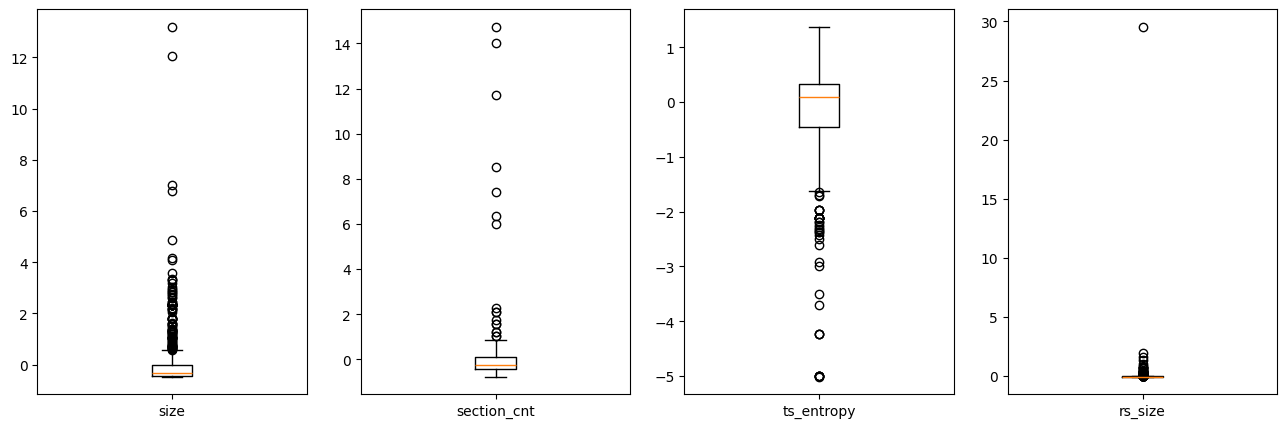

In [ ]:
# BoxPlot으로 확인
# 우리가 직접 데이터를 가공하였으므로, 데이터 생성/수집상의 오류가 있었을 가능성이 낮으므로 모든 값을 학습에 사용
plt.figure(figsize=(16,5))
plt.subplot(1, 4, 1) # 1행 4열의 4개의 그래프 중 첫번째로 state 이동
plt.boxplot([df_train['size']])
plt.xticks([1],['size'])
plt.subplot(1, 4, 2)
plt.boxplot([df_train['section_cnt']])
plt.xticks([1],['section_cnt'])
plt.subplot(1, 4, 3)
plt.boxplot([df_train['ts_entropy']])
plt.xticks([1],['ts_entropy'])
plt.subplot(1, 4, 4)
plt.boxplot([df_train['rs_size']])
plt.xticks([1],['rs_size'])

In [ ]:
# section_cnt 이상치 원본 데이터 확인
df_train[df_train['section_cnt']>80]

,index_orig,target,is_PE,has_error,size,packer,ifc,section_cnt,ts_entropy,rs_size,yara_https,file_deleted_cnt,registry_runkey_modify
hash,,,,,,,,,,,,,
2e68a37dbeee6a193688bb4c06da5cd0.vir,1851,1,True,False,1454596.0,Borland Delphi (???)\nBorland Delphi\nBorland ...,0x818f,84.0,7.998732,4096.0,False,zero,false
cfeceef885c95e8aed27589540a0ba2d.vir,8131,1,True,False,1237572.0,Microsoft Visual C++\nVC8\nMicrosoft Visual C++\n,0x103,88.0,6.524625,240392.0,True,many,false


### 데이터 정규화

In [ ]:
# 다음 컬럼에 대해 z-score 정규화
columns_to_scale = ['size', 'section_cnt', 'ts_entropy', 'rs_size']
scaler_train = preprocessing.StandardScaler()
scaler_train = scaler_train.fit(df_train[columns_to_scale])
df_train[columns_to_scale] = scaler_train.transform(df_train[columns_to_scale])
df_train

,index_orig,target,is_PE,has_error,size,packer,ifc,section_cnt,ts_entropy,rs_size,yara_https,file_deleted_cnt,registry_runkey_modify
hash,,,,,,,,,,,,,
ac282b5c526acab44530c0a995d4e23a.vir,6710,1,True,False,-0.370512,Microsoft Visual Basic\n,0x10f,-0.410197,-0.272333,-0.064162,False,unknown,unknown
7a44a4bf7c9a7f332901e6a792e9c8b5.vir,4725,0,True,False,-0.464084,Microsoft Visual C++\nVisual C++ EXE\n,0x10f,-0.410197,-0.567334,-0.064544,False,zero,false
1581f524dec2cc3ba8bef37f3ab3d1fd.vir,872,0,True,False,-0.065766,MSLRH\nUPX\nUPX (Delphi) Stub\n,0x818f,-0.410197,1.376177,-0.053071,False,zero,false
15166c91b32b49734932ccae17426f16.vir,862,1,True,False,0.286939,Petite sign ASL for DLL - *old packer \n,0x10f,-0.410197,1.376177,-0.043716,False,zero,false
cba8e5374081db7da8d45fa98359d87f.vir,7976,1,True,False,1.792063,PECompact\nPECompact\nPeCompact DLL\nPECompact...,0x10f,-0.588483,1.354430,-0.062461,True,zero,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ec20114d034e04222f58eb33d5883a8c.vir,9237,1,True,False,-0.459266,unknown,0x103,-0.231911,-0.590486,-0.062524,False,many,false
e638f5c2fc248ef94a75bbca6923cb57.vir,9004,0,True,False,0.576398,VMProtect\nASProtect\nASProtect\nASProtect\n,0x103,0.302946,1.376177,1.332020,True,zero,false
0a9dea1605ae2f00f5e3ab2b41b4548d.vir,419,1,True,False,-0.182131,Petite sign ASL for DLL - *old packer \n,0x10f,-0.410197,1.376177,-0.043716,False,zero,false


### 데이터 인코딩

In [ ]:
# 범주형 데이터 확인 : packer
df_train['packer'].value_counts(dropna=False)

,count
packer,
unknown,210
Microsoft Visual C# / Basic .NET\nMicrosoft Visual C# / Basic.NET / MS Visual Basic - ASL \nMicrosoft Visual Studio .NET\n.NET executable\nMicrosoft Visual C# / Basic .NET\n,110
Microsoft Visual C++\nVC8\nMicrosoft Visual C++\n,88
Borland Delphi (???)\n,32
Microsoft Visual Basic\nMicrosoft Visual Basic\nMicrosoft Visual Basic\n,22
...,...
Armadillo\nArmadillo\nMicrosoft Visual C++\nMicrosoft Visual C++\nMicrosoft Visual C++\n,1
MSLRH\n,1
Armadillo\nArmadillo\nMicrosoft Visual C++\nMicrosoft Visual C++\nArmadillo >> $ignBy AT4RE\nMicrosoft Visual C++\nMicrosoft Visual C++\nMicrosoft Visual C++\nMicrosoft Visual C++\nArmadillo >> $ignBy AT4RE\n,1


In [ ]:
# 범주형 데이터 확인 : packer(정상샘플)
packer_list = [val.split('\n') for val in df_train[df_train['target']==0]['packer'].values] #각 value를 줄바꿈 문자열 기준으로 split
packer_list = list(itertools.chain.from_iterable(packer_list)) # 이중 리스트 faltten
normal_packer_set = set(packer_list)
normal_packer_set

{'',
 ' x64 - UPX exe - NRV2E/7 compression ',
 '.NET executable',
 'ASProtect',
 'Armadillo',
 'Armadillo (CopyMem II)',
 'Armadillo >> $ignBy AT4RE',
 'Borland C++',
 'Borland C++ DLL',
 'Borland C++ for Win3295',
 'Borland Delphi',
 'Borland Delphi (???)',
 'Borland Delphi Component',
 'CreateInstall Stub',
 'FSG (Eng)',
 'GLBS Install Stub-bit',
 'Inno Installer] ;collides with: Borland Delphi 2.0 (Overlay)',
 'Inno Setup - Installer Maker',
 'Inno Setup Module',
 'Inno Setup Module [SFX] - v.5.x -  Borland Delphi - ASL ',
 'InstallShield',
 'Installer VISE Custom',
 'MS C++ Qt ',
 'MS Visual C++',
 'MS Visual C++ DLL',
 'MSLRH',
 'Microsoft 64bit C++ DLL - sign ASL ( 64 bit ) ',
 'Microsoft Visual Basic',
 'Microsoft Visual Basic DLL',
 'Microsoft Visual C',
 'Microsoft Visual C# / Basic .NET',
 'Microsoft Visual C# / Basic.NET / MS Visual Basic - ASL ',
 'Microsoft Visual C++',
 'Microsoft Visual C++ (2)',
 'Microsoft Visual C++ (3.0 old crap)',
 'Microsoft Visual C++ (DLL)',
 'M

In [ ]:
# 범주형 데이터 확인 : packer(악성샘플)
packer_list = [val.split('\n') for val in df_train[df_train['target']==1]['packer'].values] #각 value를 줄바꿈 문자열 기준으로 split
packer_list = list(itertools.chain.from_iterable(packer_list)) # 이중 리스트 faltten
mal_packer_set = set(packer_list)
mal_packer_set

{'',
 ' x64 - UPX exe - NRV2E/7 compression ',
 ' x64 GO Programming Language ( 64 bit ) ',
 ' x64 UPX DLL file - sign ASL ( bit ) ',
 '.NET executable',
 'ACProtect DLL',
 'AHTeam EP Protector (fake PCGuard 4.03-4.15)',
 'ASPack',
 'ASProtect',
 'Armadillo',
 'Armadillo (CopyMem II)',
 'Armadillo >> $ignBy AT4RE',
 'BobSoft Mini Delphi',
 'Borland C++ DLL',
 'Borland Delphi',
 'Borland Delphi (???)',
 'Borland Delphi - Nstd EP - ASL sign ',
 'CodeCrypt',
 'FSG (Eng)',
 'Freshbind',
 'Inno Installer] ;collides with: Borland Delphi 2.0 (Overlay)',
 'Inno Setup - Installer Maker',
 'Inno Setup Module',
 'Inno Setup Module [SFX] - v.5.x -  Borland Delphi - ASL ',
 'InstallShield',
 'Installer VISE Custom',
 'LCC Win32',
 'LCC-Win32',
 'MS Visual C++',
 'MS Visual C++ DLL',
 'MSLRH',
 'Microsoft 64bit C++ DLL - sign ASL ( 64 bit ) ',
 'Microsoft CAB SFX',
 'Microsoft Visual Basic',
 'Microsoft Visual C# / Basic .NET',
 'Microsoft Visual C# / Basic.NET / MS Visual Basic - ASL ',
 'Microsoft

In [ ]:
# 악성샘플과 정상샘플 모두가 사용하는 packer
common_packer = normal_packer_set.intersection(mal_packer_set)
common_packer

{'',
 ' x64 - UPX exe - NRV2E/7 compression ',
 '.NET executable',
 'ASProtect',
 'Armadillo',
 'Armadillo (CopyMem II)',
 'Armadillo >> $ignBy AT4RE',
 'Borland C++ DLL',
 'Borland Delphi',
 'Borland Delphi (???)',
 'FSG (Eng)',
 'Inno Installer] ;collides with: Borland Delphi 2.0 (Overlay)',
 'Inno Setup - Installer Maker',
 'Inno Setup Module',
 'Inno Setup Module [SFX] - v.5.x -  Borland Delphi - ASL ',
 'InstallShield',
 'Installer VISE Custom',
 'MS Visual C++',
 'MS Visual C++ DLL',
 'MSLRH',
 'Microsoft 64bit C++ DLL - sign ASL ( 64 bit ) ',
 'Microsoft Visual Basic',
 'Microsoft Visual C# / Basic .NET',
 'Microsoft Visual C# / Basic.NET / MS Visual Basic - ASL ',
 'Microsoft Visual C++',
 'Microsoft Visual C++ (DLL)',
 'Microsoft Visual C++ DLL',
 'Microsoft Visual Studio .NET',
 'MingWin32 GCC',
 'Netopsystems FEAD Optimizer',
 'Nullsoft PiMP Stub',
 'PECompact',
 'PeCompact DLL',
 'RAR SFX',
 'Rar SFX Archive',
 'UPX',
 'UPX (Delphi) Stub',
 'UPX (EXE_LZMA)',
 'UPX (LZMA)',


In [ ]:
# 범주형 데이터 확인 : image file characteristics
df_train['ifc'].value_counts(dropna=False)[:10]

,count
ifc,
0x10f,199
0x2102,132
0x102,122
0x210e,58
0x103,54
0x22,43
0x2022,42
0x818e,33
0x10e,27


In [ ]:
# 데이터 원핫 인코딩
df_train = pd.get_dummies(df_train, columns = ['file_deleted_cnt', 'registry_runkey_modify'])

In [ ]:
df_train

,index_orig,target,is_PE,has_error,size,packer,ifc,section_cnt,ts_entropy,rs_size,yara_https,file_deleted_cnt_many,file_deleted_cnt_unknown,file_deleted_cnt_zero,registry_runkey_modify_false,registry_runkey_modify_true,registry_runkey_modify_unknown
hash,,,,,,,,,,,,,,,,,
ac282b5c526acab44530c0a995d4e23a.vir,6710,1,True,False,-0.370512,Microsoft Visual Basic\n,0x10f,-0.410197,-0.272333,-0.064162,False,False,True,False,False,False,True
7a44a4bf7c9a7f332901e6a792e9c8b5.vir,4725,0,True,False,-0.464084,Microsoft Visual C++\nVisual C++ EXE\n,0x10f,-0.410197,-0.567334,-0.064544,False,False,False,True,True,False,False
1581f524dec2cc3ba8bef37f3ab3d1fd.vir,872,0,True,False,-0.065766,MSLRH\nUPX\nUPX (Delphi) Stub\n,0x818f,-0.410197,1.376177,-0.053071,False,False,False,True,True,False,False
15166c91b32b49734932ccae17426f16.vir,862,1,True,False,0.286939,Petite sign ASL for DLL - *old packer \n,0x10f,-0.410197,1.376177,-0.043716,False,False,False,True,True,False,False
cba8e5374081db7da8d45fa98359d87f.vir,7976,1,True,False,1.792063,PECompact\nPECompact\nPeCompact DLL\nPECompact...,0x10f,-0.588483,1.354430,-0.062461,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ec20114d034e04222f58eb33d5883a8c.vir,9237,1,True,False,-0.459266,unknown,0x103,-0.231911,-0.590486,-0.062524,False,True,False,False,True,False,False
e638f5c2fc248ef94a75bbca6923cb57.vir,9004,0,True,False,0.576398,VMProtect\nASProtect\nASProtect\nASProtect\n,0x103,0.302946,1.376177,1.332020,True,False,False,True,True,False,False
0a9dea1605ae2f00f5e3ab2b41b4548d.vir,419,1,True,False,-0.182131,Petite sign ASL for DLL - *old packer \n,0x10f,-0.410197,1.376177,-0.043716,False,False,False,True,True,False,False


# 3-3. 탐색적 분석 : 산포도 분석

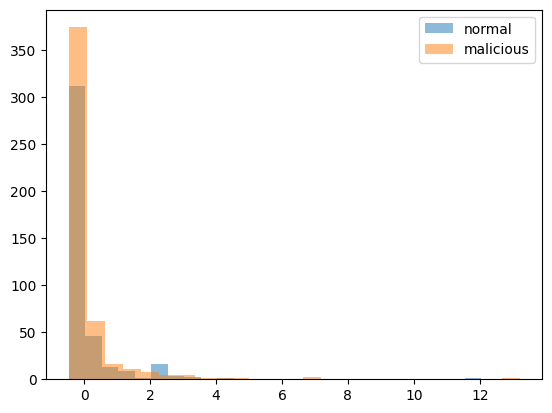

In [ ]:
# 히스토그램 - size
hist1 = df_train[df_train['target']==0]['size']
hist2 = df_train[df_train['target']==1]['size']
plt.hist(hist1,label='normal', alpha=0.5, bins=25)
plt.hist(hist2,label='malicious', alpha=0.5, bins=25)
plt.legend(loc=0)

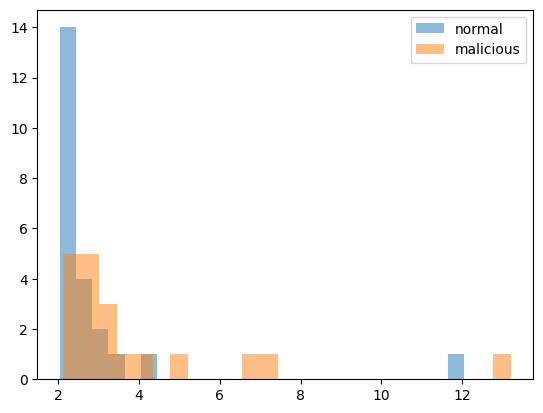

In [ ]:
# 히스토그램 - size (관심영역 초점)
hist1 = df_train[(df_train['target']==0) & (df_train['size']>2)]['size']
hist2 = df_train[(df_train['target']==1) & (df_train['size']>2)]['size']
plt.hist(hist1,label='normal', alpha=0.5, bins=25)
plt.hist(hist2,label='malicious', alpha=0.5, bins=25)
plt.legend(loc=0)

<Axes: xlabel='section_cnt', ylabel='ts_entropy'>

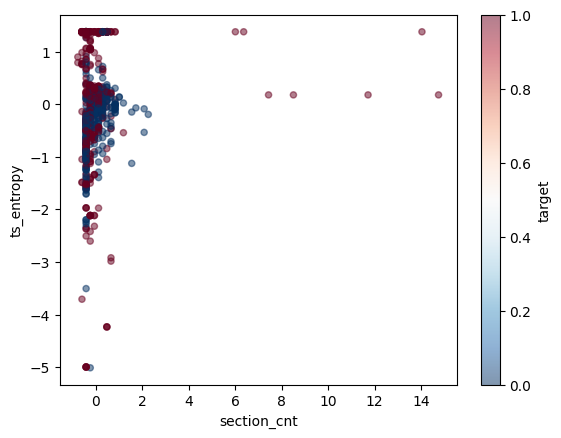

In [ ]:
# 산점도 plot
df_train.plot.scatter(x='section_cnt', y='ts_entropy', c='target', colormap='RdBu_r', alpha=0.5)

### 전처리 프로세스 함수화

In [ ]:
def part3_preprocessing(df, mode='train', replace_ts_entropy=None, scaler=None):
    # PE 포맷의 데이터만 학습에 사용
    df = df[df["is_PE"]==True]

    # Feature 추출에 성공한 데이터만 학습에 사용
    df = df[df["has_error"]==False]

    # 결측치 처리 - packer
    df['packer'] = df['packer'].fillna('unknown')


    # 결측치 처리 - packer


    # 결측치 처리(대체) - ts_entropy: max 값으로 대체
    if mode == 'train':
      replace_ts_entropy = df['ts_entropy'].max()
    df['ts_entropy'] = df['ts_entropy'].fillna(replace_ts_entropy)



    # 결측치 처리(대체) - rs_size: 0으로 대체
    df['rs_size'] = df['rs_size'].fillna(0)


    # 결측치 처리 - file_deleted: 카테고리화 => 추후 원핫 인코딩
    df.loc[(df['file_deleted_cnt'] > 0), 'file_deleted_cnt']="many"
    df.loc[(df['file_deleted_cnt'] == 0), 'file_deleted_cnt']="zero"
    df.loc[df['file_deleted_cnt'].isnull(), 'file_deleted_cnt']="unknown"


    # 결측치 처리 - registry_runkey_modify: 카테고리화 => 추후 원핫 인코딩
    df.loc[(df['registry_runkey_modify'] == True), 'registry_runkey_modify']="true"
    df.loc[(df['registry_runkey_modify'] == False), 'registry_runkey_modify']="false"
    df.loc[df['registry_runkey_modify'].isnull(), 'registry_runkey_modify']="unknown"


    # 다음 컬럼에 대해 z-score 정규화
    columns_to_scale = ['size', 'section_cnt', 'ts_entropy', 'rs_size']
    if mode == 'train':
      scaler = preprocessing.StandardScaler()
    scaler = scaler.fit(df[columns_to_scale])
    df[columns_to_scale] = scaler.transform(df[columns_to_scale])

    # 데이터 원핫 인코딩
    df = pd.get_dummies(df, columns = ['file_deleted_cnt', 'registry_runkey_modify'])

    return df, replace_ts_entropy, scaler

In [ ]:
# 학습 데이터 전처리 (일괄 적용)
df_train = pd.read_csv(colab_path + 'data_with_feature_csv/train_1st.csv', index_col='hash')
df_train, replace_ts_entropy, scaler = part3_preprocessing(df_train, 'train')
df_train

/tmp/ipython-input-68-41008185.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'many' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df['file_deleted_cnt'] > 0), 'file_deleted_cnt']="many"


,index_orig,target,is_PE,has_error,size,packer,ifc,section_cnt,ts_entropy,rs_size,yara_https,file_deleted_cnt_many,file_deleted_cnt_unknown,file_deleted_cnt_zero,registry_runkey_modify_false,registry_runkey_modify_true,registry_runkey_modify_unknown
hash,,,,,,,,,,,,,,,,,
ac282b5c526acab44530c0a995d4e23a.vir,6710,1,True,False,-0.370512,Microsoft Visual Basic\n,0x10f,-0.410197,-0.272333,-0.064162,False,False,True,False,False,False,True
7a44a4bf7c9a7f332901e6a792e9c8b5.vir,4725,0,True,False,-0.464084,Microsoft Visual C++\nVisual C++ EXE\n,0x10f,-0.410197,-0.567334,-0.064544,False,False,False,True,True,False,False
1581f524dec2cc3ba8bef37f3ab3d1fd.vir,872,0,True,False,-0.065766,MSLRH\nUPX\nUPX (Delphi) Stub\n,0x818f,-0.410197,1.376177,-0.053071,False,False,False,True,True,False,False
15166c91b32b49734932ccae17426f16.vir,862,1,True,False,0.286939,Petite sign ASL for DLL - *old packer \n,0x10f,-0.410197,1.376177,-0.043716,False,False,False,True,True,False,False
cba8e5374081db7da8d45fa98359d87f.vir,7976,1,True,False,1.792063,PECompact\nPECompact\nPeCompact DLL\nPECompact...,0x10f,-0.588483,1.354430,-0.062461,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ec20114d034e04222f58eb33d5883a8c.vir,9237,1,True,False,-0.459266,unknown,0x103,-0.231911,-0.590486,-0.062524,False,True,False,False,True,False,False
e638f5c2fc248ef94a75bbca6923cb57.vir,9004,0,True,False,0.576398,VMProtect\nASProtect\nASProtect\nASProtect\n,0x103,0.302946,1.376177,1.332020,True,False,False,True,True,False,False
0a9dea1605ae2f00f5e3ab2b41b4548d.vir,419,1,True,False,-0.182131,Petite sign ASL for DLL - *old packer \n,0x10f,-0.410197,1.376177,-0.043716,False,False,False,True,True,False,False


In [ ]:
df_train.isnull().sum()

,0
index_orig,0
target,0
is_PE,0
has_error,0
size,0
packer,0
ifc,0
section_cnt,0
ts_entropy,0
rs_size,0


### 전처리 데이터 저장

In [ ]:
# 추후 모델링을 위해 저장
df_train.to_csv(colab_path + 'data_with_feature_csv/train_processed1.csv')

# 3-4. 모델링 & 3-5. 모델 평가 및 검증

In [ ]:
# 전처리된 파일 로드
df_train = pd.read_csv(colab_path + "data_with_feature_csv/train_processed1.csv", index_col='hash')
df_train

,index_orig,target,is_PE,has_error,size,packer,ifc,section_cnt,ts_entropy,rs_size,yara_https,file_deleted_cnt_many,file_deleted_cnt_unknown,file_deleted_cnt_zero,registry_runkey_modify_false,registry_runkey_modify_true,registry_runkey_modify_unknown
hash,,,,,,,,,,,,,,,,,
ac282b5c526acab44530c0a995d4e23a.vir,6710,1,True,False,-0.370512,Microsoft Visual Basic\n,0x10f,-0.410197,-0.272333,-0.064162,False,False,True,False,False,False,True
7a44a4bf7c9a7f332901e6a792e9c8b5.vir,4725,0,True,False,-0.464084,Microsoft Visual C++\nVisual C++ EXE\n,0x10f,-0.410197,-0.567334,-0.064544,False,False,False,True,True,False,False
1581f524dec2cc3ba8bef37f3ab3d1fd.vir,872,0,True,False,-0.065766,MSLRH\nUPX\nUPX (Delphi) Stub\n,0x818f,-0.410197,1.376177,-0.053071,False,False,False,True,True,False,False
15166c91b32b49734932ccae17426f16.vir,862,1,True,False,0.286939,Petite sign ASL for DLL - *old packer \n,0x10f,-0.410197,1.376177,-0.043716,False,False,False,True,True,False,False
cba8e5374081db7da8d45fa98359d87f.vir,7976,1,True,False,1.792063,PECompact\nPECompact\nPeCompact DLL\nPECompact...,0x10f,-0.588483,1.354430,-0.062461,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ec20114d034e04222f58eb33d5883a8c.vir,9237,1,True,False,-0.459266,unknown,0x103,-0.231911,-0.590486,-0.062524,False,True,False,False,True,False,False
e638f5c2fc248ef94a75bbca6923cb57.vir,9004,0,True,False,0.576398,VMProtect\nASProtect\nASProtect\nASProtect\n,0x103,0.302946,1.376177,1.332020,True,False,False,True,True,False,False
0a9dea1605ae2f00f5e3ab2b41b4548d.vir,419,1,True,False,-0.182131,Petite sign ASL for DLL - *old packer \n,0x10f,-0.410197,1.376177,-0.043716,False,False,False,True,True,False,False


In [ ]:
# 학습할 Feature 선택 및 X,y 분리
target_col = 'target'
cols_to_train = ['size', 'section_cnt', 'ts_entropy', 'rs_size', 'yara_https',
                 'file_deleted_cnt_many', 'file_deleted_cnt_unknown',
                 'file_deleted_cnt_zero', 'registry_runkey_modify_false',
                 'registry_runkey_modify_unknown']
#cols_to_train = ['size', 'section_cnt', 'ts_entropy', 'rs_size']
train_y = df_train[target_col]
train_X = df_train[cols_to_train]
train_X

,size,section_cnt,ts_entropy,rs_size,yara_https,file_deleted_cnt_many,file_deleted_cnt_unknown,file_deleted_cnt_zero,registry_runkey_modify_false,registry_runkey_modify_unknown
hash,,,,,,,,,,
ac282b5c526acab44530c0a995d4e23a.vir,-0.370512,-0.410197,-0.272333,-0.064162,False,False,True,False,False,True
7a44a4bf7c9a7f332901e6a792e9c8b5.vir,-0.464084,-0.410197,-0.567334,-0.064544,False,False,False,True,True,False
1581f524dec2cc3ba8bef37f3ab3d1fd.vir,-0.065766,-0.410197,1.376177,-0.053071,False,False,False,True,True,False
15166c91b32b49734932ccae17426f16.vir,0.286939,-0.410197,1.376177,-0.043716,False,False,False,True,True,False
cba8e5374081db7da8d45fa98359d87f.vir,1.792063,-0.588483,1.354430,-0.062461,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...
ec20114d034e04222f58eb33d5883a8c.vir,-0.459266,-0.231911,-0.590486,-0.062524,False,True,False,False,True,False
e638f5c2fc248ef94a75bbca6923cb57.vir,0.576398,0.302946,1.376177,1.332020,True,False,False,True,True,False
0a9dea1605ae2f00f5e3ab2b41b4548d.vir,-0.182131,-0.410197,1.376177,-0.043716,False,False,False,True,True,False


In [ ]:
# 훈련용/평가용 데이터 분할
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.3, random_state=42 )
train_X

,size,section_cnt,ts_entropy,rs_size,yara_https,file_deleted_cnt_many,file_deleted_cnt_unknown,file_deleted_cnt_zero,registry_runkey_modify_false,registry_runkey_modify_unknown
hash,,,,,,,,,,
2d6fc48debbcad6f49a2c1a66915ac87.vir,-0.458340,-0.410197,-0.763602,-0.064215,False,False,True,False,False,True
f88cf1f710d1f9c0cdf0876e4e2bbab5.vir,-0.420957,-0.053626,0.145827,-0.064500,False,False,True,False,False,True
d2ed205f668c02c8976cf8adf2807608.vir,-0.378521,0.481231,0.244578,-0.064017,False,False,True,False,False,True
dffd7021a39698acd2d7b7c9b0b252fa.vir,-0.457560,-0.410197,-0.909160,-0.064245,False,False,True,False,False,True
908c27608999bd8f31b27454d1c63e89.vir,-0.261096,0.124660,0.077916,-0.037155,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...
c232c3a9361452c5b3982f59be4aaace.vir,-0.454641,-0.410197,-1.026431,-0.064227,False,False,True,False,False,True
b44fedb16da624819f94b95220c580bf.vir,-0.107951,-0.410197,-0.160226,-0.038582,False,False,False,True,False,False
2e29c4bbaff056a0ccc03e0244b0aad4.vir,-0.468073,-0.231911,-2.116330,-0.064544,False,False,True,False,False,True


In [ ]:
# 모델1 학습 및 평가
model1 = LogisticRegression(C=20, max_iter=1000, random_state=42)
model1.fit(train_X, train_y)
print(model1.score(train_X, train_y))  # accuracy
print(model1.score(val_X, val_y))

0.7030497592295345
0.753731343283582


In [ ]:
# 모델 2 학습 및 평가
model2 = SVC(kernel = 'linear', probability=True, random_state=42)
model2.fit(train_X, train_y)
print(model2.score(train_X, train_y))  # accuracy
print(model2.score(val_X, val_y))

0.6982343499197432
0.7276119402985075


In [ ]:
# 모델 3 학습 및 평가
model3 = RandomForestClassifier(max_depth = 3, random_state=42)
model3.fit(train_X, train_y)
print(model3.score(train_X, train_y))  # accuracy
print(model3.score(val_X, val_y))

0.7447833065810594
0.7425373134328358


In [ ]:
# 모델 1 저장
save_dict ={
    "model" : model1,
    "target_col": target_col,
    "cols_to_train" : cols_to_train
}
with open(colab_path + 'model/saved_model.pickle','wb') as fw:
    pickle.dump(save_dict, fw)

In [ ]:
# 모델 2 저장
save_dict ={
    "model" : model2,
    "target_col": target_col,
    "cols_to_train" : cols_to_train
}
with open(colab_path + 'model/saved_model.pickle','wb') as fw:
    pickle.dump(save_dict, fw)

In [ ]:
# 모델 3 저장
save_dict ={
    "model" : model3,
    "target_col": target_col,
    "cols_to_train" : cols_to_train
}
with open(colab_path + 'model/saved_model.pickle','wb') as fw:
    pickle.dump(save_dict, fw)

# 3-6. 모델 적용 및 운영방안 수립

In [ ]:
# 저장된 모델 로드
with open(colab_path + 'model/saved_model.pickle','rb') as f:
    saved_dict = pickle.load(f)
model = saved_dict['model']
target_col = saved_dict['target_col']
cols_to_train = saved_dict['cols_to_train']

In [ ]:
# 테스트용 데이터 로드
df_test = pd.read_csv(colab_path + "data_orig/testSet_label_300.csv", index_col='hash')


In [ ]:
%%time
# feature 추출
df_test = feature_extract(df_test, 'test')

0
8363705b142ea67ae7d617873c80ce6a.vir
Command '['peid', 'gdrive/My Drive/AI보안교육/part3/data_test/8363705b142ea67ae7d617873c80ce6a.vir']' returned non-zero exit status 1.
e881abc0bdf41e072f3ab30a555320e2.vir
Command '['peid', 'gdrive/My Drive/AI보안교육/part3/data_test/e881abc0bdf41e072f3ab30a555320e2.vir']' returned non-zero exit status 1.
f5c861a0ba8d35f023aa4cc670278b10.vir
Command '['peid', 'gdrive/My Drive/AI보안교육/part3/data_test/f5c861a0ba8d35f023aa4cc670278b10.vir']' returned non-zero exit status 1.
34292c58a542f9a3504922684d03c0e3.vir
Command '['peid', 'gdrive/My Drive/AI보안교육/part3/data_test/34292c58a542f9a3504922684d03c0e3.vir']' returned non-zero exit status 1.
50
3edc889be0eb76a86491cca98c4ea2b5.vir
Command '['peid', 'gdrive/My Drive/AI보안교육/part3/data_test/3edc889be0eb76a86491cca98c4ea2b5.vir']' returned non-zero exit status 1.
100
010c13043da6cba93306114f6c5e9045.vir
Command '['peid', 'gdrive/My Drive/AI보안교육/part3/data_test/010c13043da6cba93306114f6c5e9045.vir']' returned non-zer

In [ ]:
# 테스트 데이터 전처리 (일괄 적용)
df_test, replace_ts_entropy, scaler = part3_preprocessing(df_test, 'test', replace_ts_entropy, scaler)

/tmp/ipython-input-68-41008185.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'many' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df['file_deleted_cnt'] > 0), 'file_deleted_cnt']="many"


In [ ]:
# 전처리된 테스트용 데이터 저장
df_test.to_csv(colab_path + 'data_with_feature_csv/test_processed1.csv')

In [ ]:
# 전처리된 테스트용 데이터 로드
df_test = pd.read_csv(colab_path + 'data_with_feature_csv/test_processed1.csv', index_col='hash')

In [ ]:
# 예측할 Feature 선택 및 X,y 분리
test_y = df_test[target_col]
test_X = df_test[cols_to_train]
test_X

,size,section_cnt,ts_entropy,rs_size,yara_https,file_deleted_cnt_many,file_deleted_cnt_unknown,file_deleted_cnt_zero,registry_runkey_modify_false,registry_runkey_modify_unknown
hash,,,,,,,,,,
843a0c18209c7131ab1e49638043b2f2.vir,0.358994,0.565135,0.445533,-0.190238,True,False,False,True,True,False
07dc5abde5d5751e482421afd3a99259.vir,0.358994,0.565135,0.445533,-0.190238,True,False,True,False,False,True
d9e91b86eb46757755cd548eab28185e.vir,-0.534475,-0.862840,-1.953198,-0.186035,False,False,False,True,True,False
25ff1ff4af5e2e649746452c543b1ed1.vir,0.548745,0.089143,0.247948,1.638150,True,True,False,False,True,False
1dd7cf9c572c21b9aa4bc0f71f89822a.vir,-0.348692,-0.862840,-0.127766,-0.189800,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
0c8dec2fd293ba2d8f7ef6c7f216a8bc.vir,-0.200941,0.565135,0.195292,-0.190146,False,False,True,False,False,True
37d58ba872c83cac27e76c7945c9efe0.vir,-0.341110,1.041126,0.130809,-0.182402,False,False,True,False,False,True
7c6a23dbc46ecdfc9bfd11c9f67268cf.vir,-0.550190,-0.386848,-2.103883,-0.191408,False,False,True,False,False,True


In [ ]:
# 모델 성능 - accuracy
model.score(test_X, test_y)

0.7420494699646644

In [ ]:
# 테스트 데이터에 대한 예측 값 산출
pred_y = model.predict(test_X)

# 모델 성능 - confusion matrix
conf_mat = confusion_matrix(y_true=test_y, y_pred=pred_y)
conf_mat

array([[ 32,  66],
       [  7, 178]])

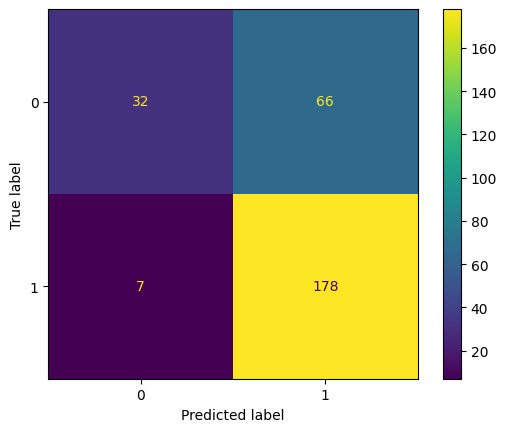

In [ ]:
# confusion matrix 시각화
ConfusionMatrixDisplay.from_predictions(test_y, pred_y, normalize=None)

In [ ]:
df_test['target'].value_counts().sort_index()

,count
target,
0,98
1,185
